#### Random sample imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values
 
When should it be used? It assumes that the data are missing completely at random(MCAR).

In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv('Titanic-Train-Data.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].isnull().sum()

177

In [6]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [7]:
#by functionally we can do
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+'_random']=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    #pandas needs to have some index to merge the dataset.
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),df[variable+'_random']]=random_sample
    

In [8]:
median=df['Age'].median()

In [9]:
impute_nan(df,'Age',median)

In [10]:
df.head()

,Survived,Age,Fare,Age_median,Age_random,22.0,22.0,22.0,22.0,22.0,...,24.5,6.0,6.0,6.0,0.67,30.5,30.5,0.42,34.5,74.0
0,0,22.0,7.2500,22.0,22.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,38.0,71.2833,38.0,38.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,26.0,7.9250,26.0,26.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,35.0,53.1000,35.0,35.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,35.0,8.0500,35.0,35.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [12]:
impute_nan(df,'Age',median)

In [13]:
df.head()

,Survived,Age,Fare,Age_median,Age_random,22.0,22.0,22.0,22.0,22.0,...,24.5,6.0,6.0,6.0,0.67,30.5,30.5,0.42,34.5,74.0
0,0,22.0,7.2500,22.0,22.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,38.0,71.2833,38.0,38.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,26.0,7.9250,26.0,26.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,35.0,53.1000,35.0,35.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,35.0,8.0500,35.0,35.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df1=df.iloc[:,0:5]

In [15]:
df1

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


C:\Users\saika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

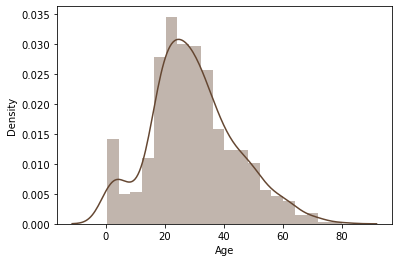

In [16]:
#now we can plot the dist plot for distribution.
import seaborn as sns
sns.distplot(df['Age'],color='#654732')

C:\Users\saika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age_random', ylabel='Density'>

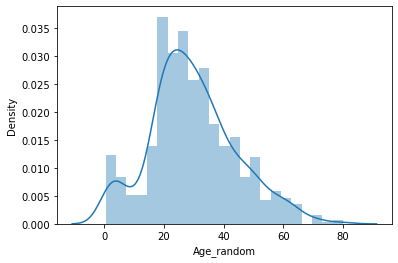

In [17]:
sns.distplot(df1['Age_random'])

### summary
by comparing the two distributions the std will same.


### Advantages
1.Easy To implement

2.There is less distortion in variance
### Disadvantage
1.Every situation randomness wont work

### Capturing NAN values with a new feature

It works well if the data are not missing completely at random(MNAR)



In [1]:
import numpy as np 
import pandas as pd


In [2]:
df=pd.read_csv('Titanic-Train-Data.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df['Age_missing']=np.where(df['Age'].isnull(),1,0)

In [5]:
df.head() #this is what excatly the acpturing null values with new feature.

,Survived,Age,Fare,Age_missing
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [10]:
df['Age'].fillna(df['Age'].median(),inplace=True) #we can also use random sample imputation

In [11]:
df.head(20)

,Survived,Age,Fare,Age_missing
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages
1.Easy to implement

2.Captures the importance of missing values
#### Disadvantages
1.Creating Additional Features(Curse of Dimensionality)

#### End of Distribution imputation

In [12]:
df=pd.read_csv('Titanic-Train-Data.csv',usecols=['Age','Fare','Survived'])

In [13]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


C:\Users\saika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

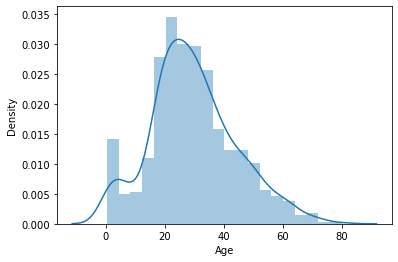

In [16]:
import seaborn as sns
sns.distplot(df['Age'])

C:\Users\saika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

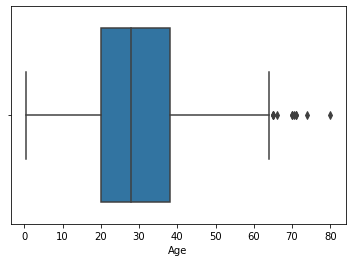

In [17]:
#we can choose the value from the mean that means to choose the value after 3rd std.
#we can see also outliers.
sns.boxplot('Age',data=df)

In [19]:
extreme=df['Age'].mean()+3*df['Age'].std()
median=df['Age'].median()

In [25]:
def impute_nan(df,variable,extreme,median):
    df[variable+'_end_distrinution']=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [26]:
impute_nan(df,'Age',extreme,median)

In [27]:
df.head()

,Survived,Age,Fare,Age_end_distrinution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

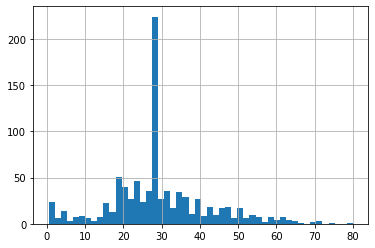

In [29]:
df['Age'].hist(bins=50)

<AxesSubplot:>

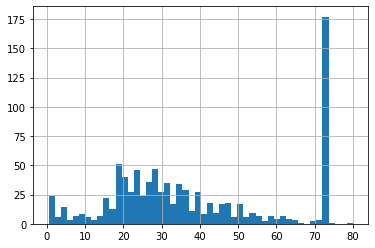

In [32]:
df['Age_end_distrinution'].hist(bins=50)

C:\Users\saika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distrinution'>

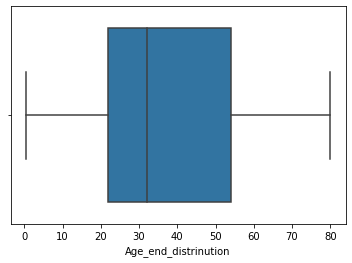

In [34]:
sns.boxplot(df['Age_end_distrinution']) #there is no outliers,so this is the advantage.